###Customer Churn Analysis

#EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Python 4th sem/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.dtypes

replace spaces with underscores

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #identify not assigned values by coerce
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
# Getting the values from the TotalCharges column where it's 0
zero_total_charges_values = df.loc[df['TotalCharges'] == 0, 'TotalCharges']

# Displaying the result
print(zero_total_charges_values.tolist())

zero_total_charges_values.value_counts()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


TotalCharges
0.0    11
Name: count, dtype: int64

In [ ]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Display unique values for each categorical variable
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    print(f'{col}: {df[col].unique()}')


gender: ['female' 'male']
SeniorCitizen: [0 1]
Partner: ['yes' 'no']
Dependents: ['no' 'yes']
PhoneService: ['no' 'yes']
MultipleLines: ['no_phone_service' 'no' 'yes']
InternetService: ['dsl' 'fiber_optic' 'no']
OnlineSecurity: ['no' 'yes' 'no_internet_service']
OnlineBackup: ['yes' 'no' 'no_internet_service']
DeviceProtection: ['no' 'yes' 'no_internet_service']
TechSupport: ['no' 'yes' 'no_internet_service']
StreamingTV: ['no' 'yes' 'no_internet_service']
StreamingMovies: ['no' 'yes' 'no_internet_service']
Contract: ['month-to-month' 'one_year' 'two_year']
PaperlessBilling: ['yes' 'no']
PaymentMethod: ['electronic_check' 'mailed_check' 'bank_transfer_(automatic)'
 'credit_card_(automatic)']
Churn: ['no' 'yes']


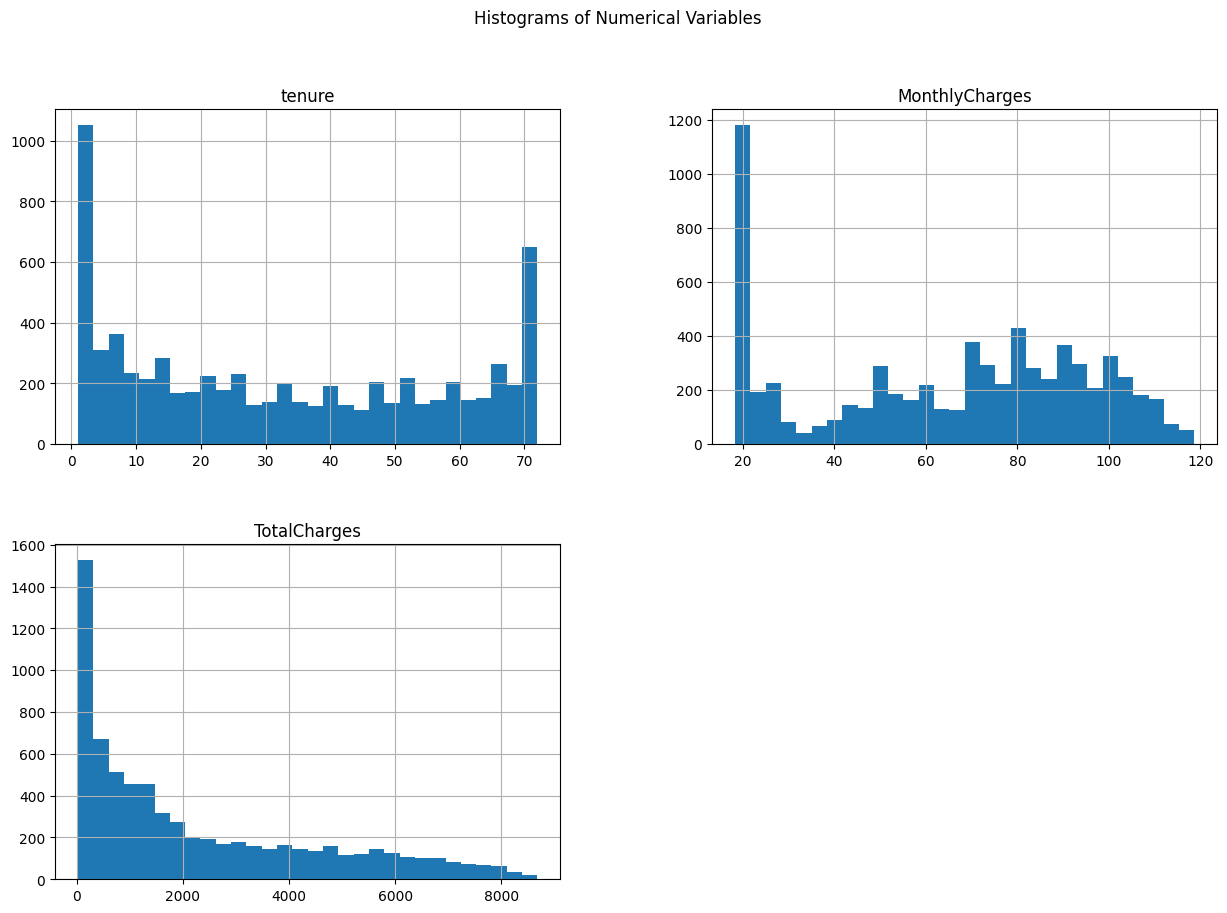

In [ ]:
# Plot histograms for numerical variables
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

In [ ]:
# Check for missing values in the 'TotalCharges' column
missing_values_count = df['TotalCharges'].isnull().sum()

print(f"Number of missing values in 'TotalCharges': {missing_values_count}")

Number of missing values in 'TotalCharges': 0


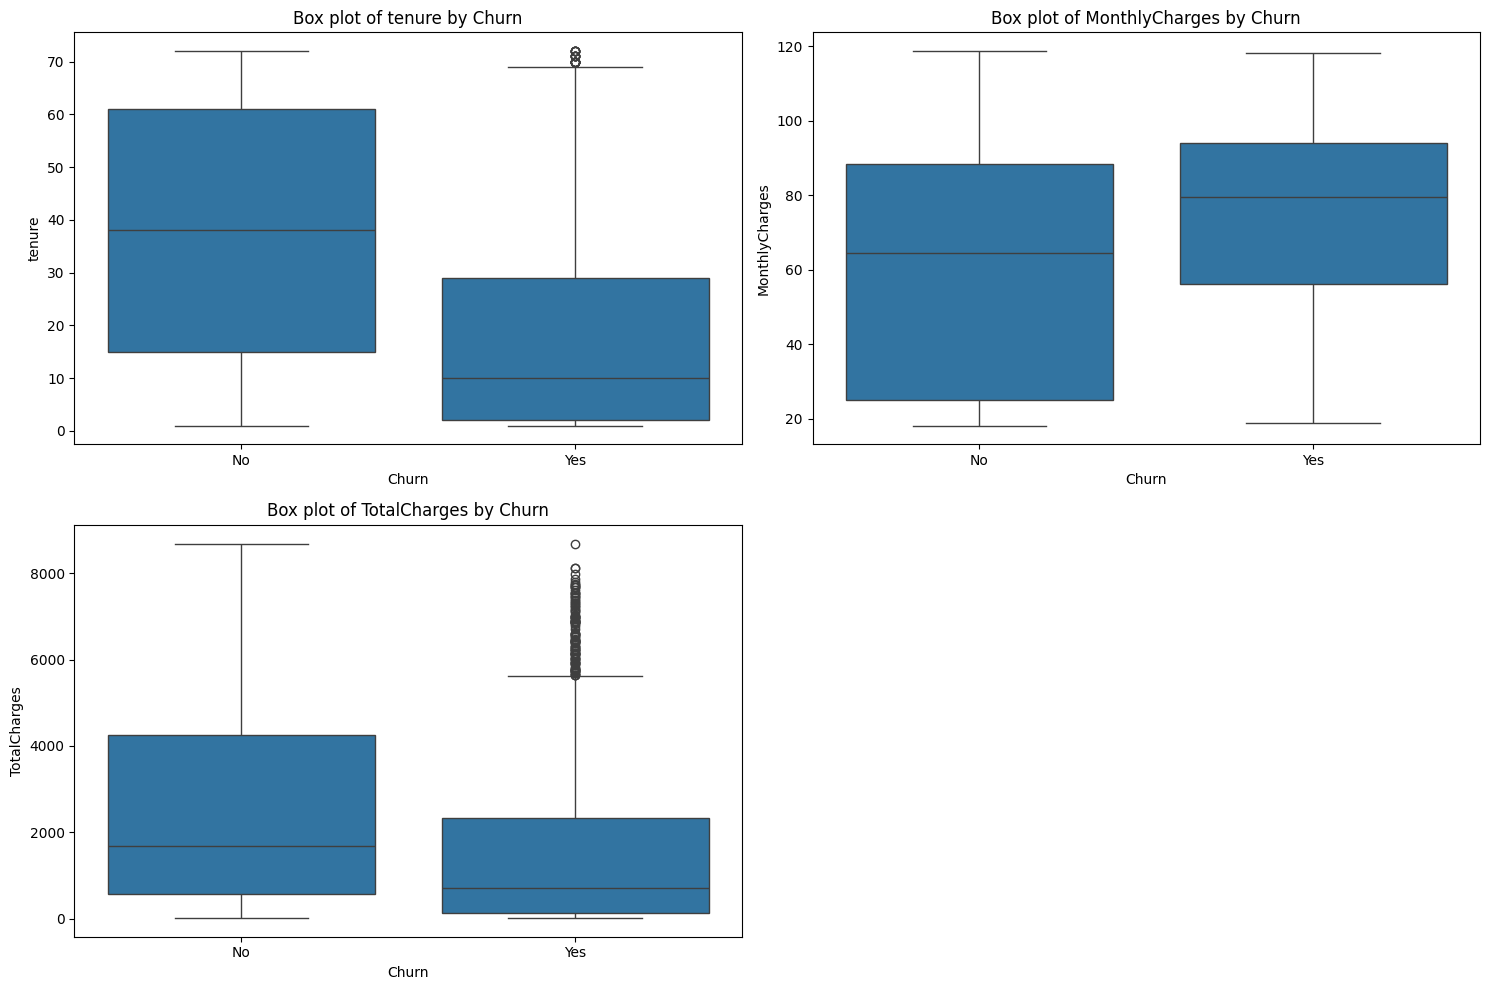

In [ ]:
# Box plots for numerical variables against churn
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Box plot of {col} by Churn')

plt.tight_layout()
plt.show()


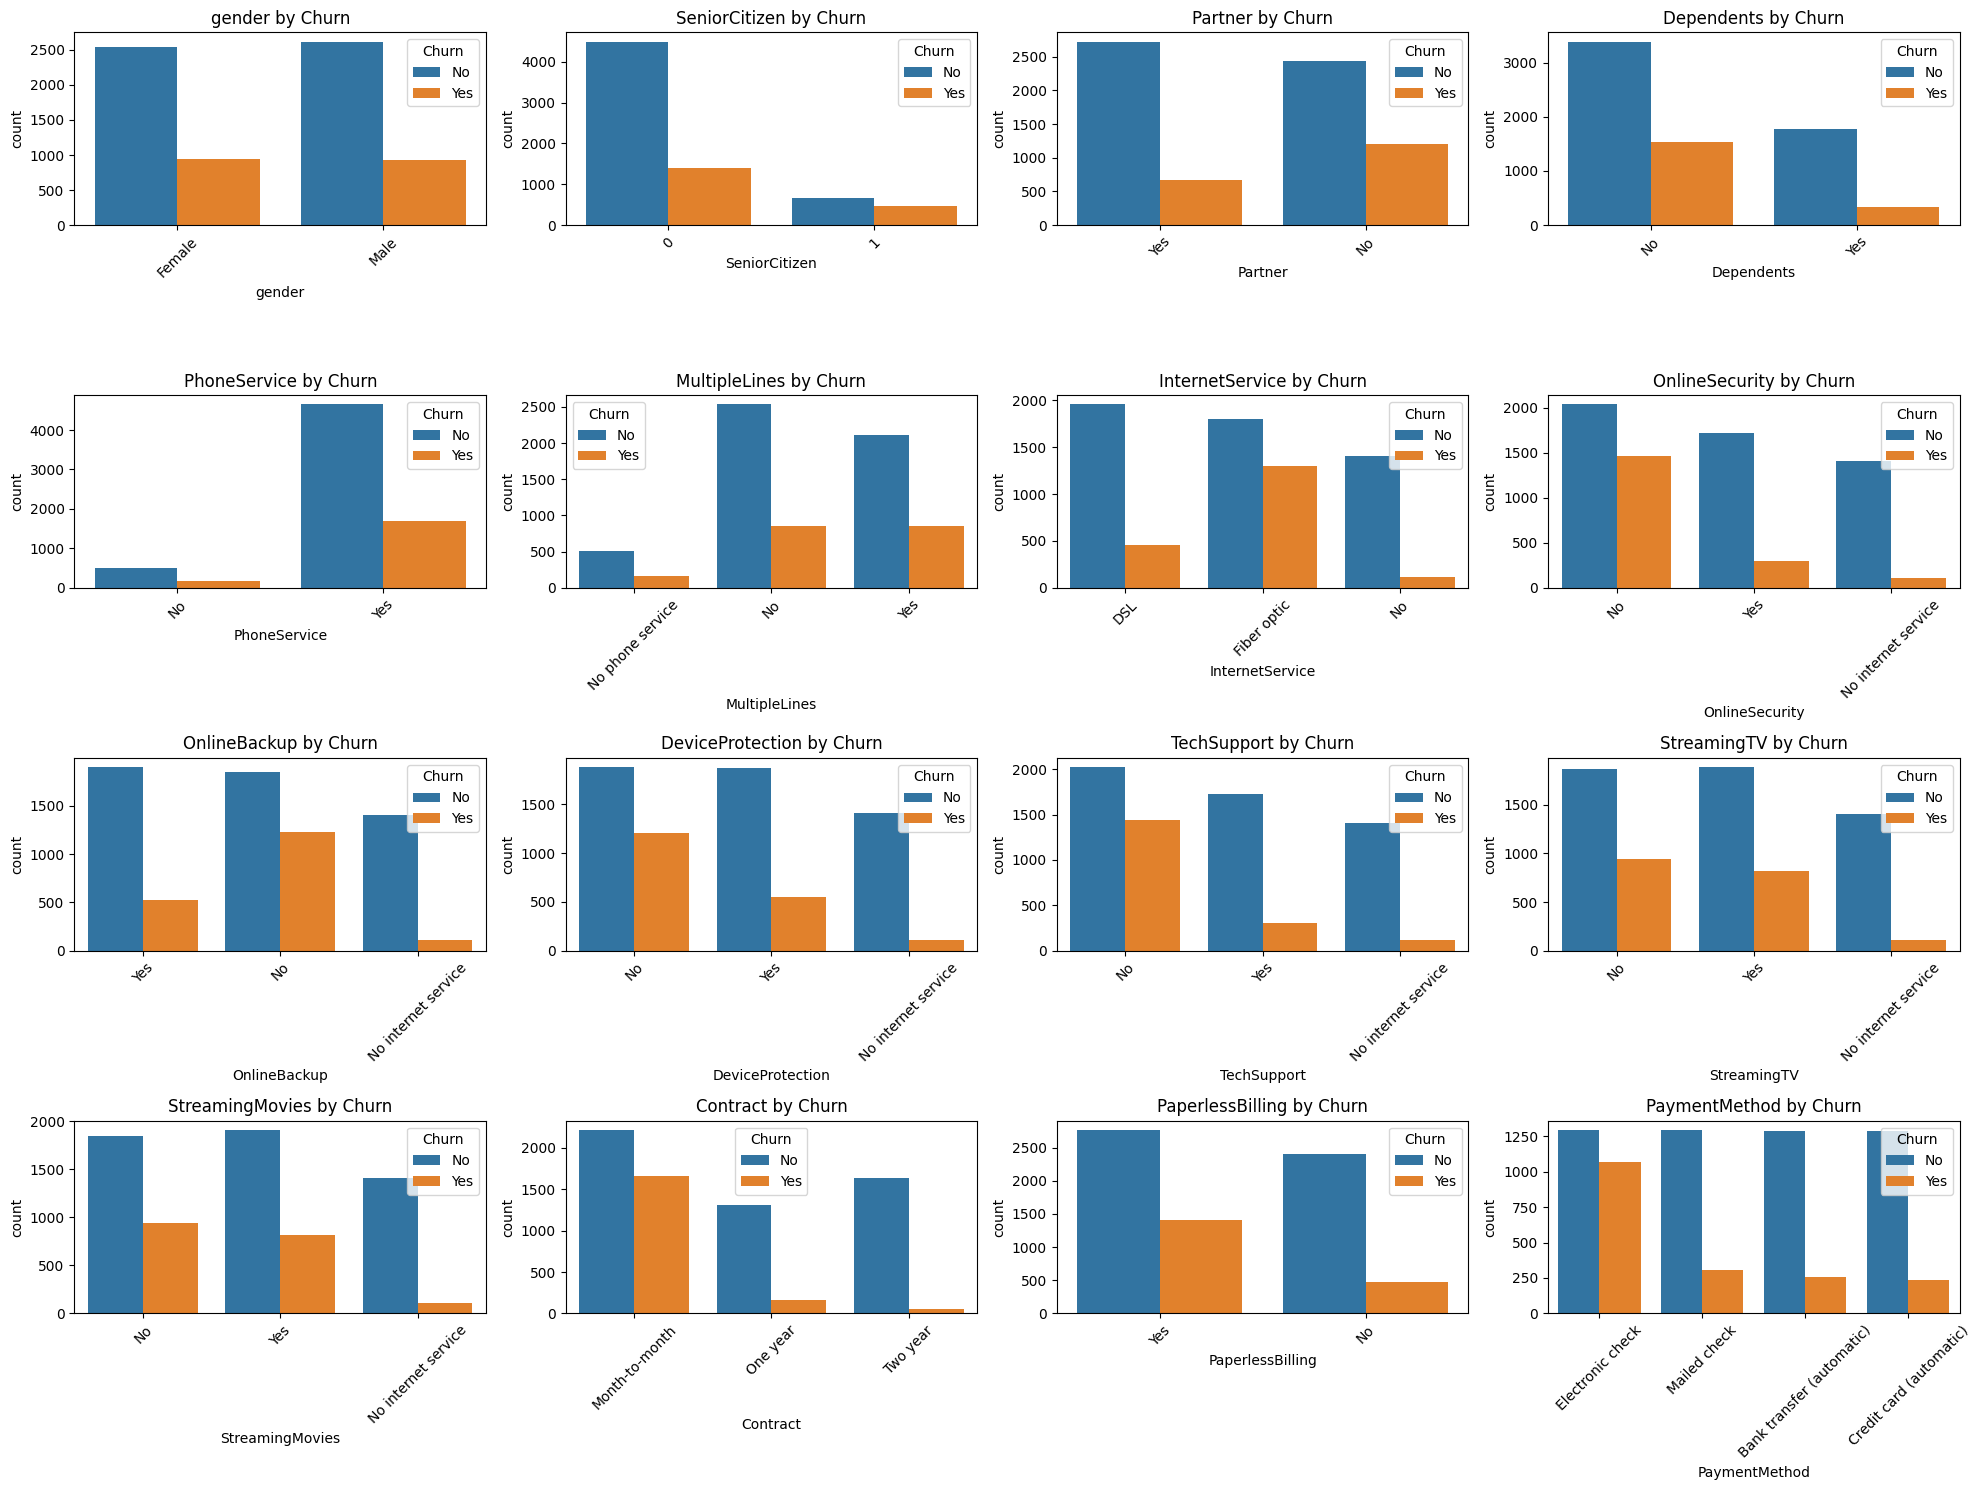

In [ ]:
# Count plots for categorical variables against churn
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns[:-1], 1):  # Exclude 'Churn' itself
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'{col} by Churn')

plt.tight_layout()
plt.show()

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
# Drop the 'customerID' column
df = df.drop(columns=['customerID'])

Encode

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is your DataFrame

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Churn' column
df['Churn'] = le.fit_transform(df['Churn'])

# Verify the transformation
print("Encoded 'Churn' column:")
print(df['Churn'].value_counts())

# Check the mapping
print("Mapping from labels to integers:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Encoded 'Churn' column:
Churn
0    5163
1    1869
Name: count, dtype: int64
Mapping from labels to integers:
{'No': 0, 'Yes': 1}


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Apply LabelEncoder to each categorical column
df_encoded = df.copy()  # Make a copy to avoid changing the original DataFrame
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Display the encoded DataFrame
print(df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [ ]:
df_encoded['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


##Feature Importance Analysis

1. Churn Rate

In [ ]:
import pandas as pd

# Sample DataFrame setup for demonstration (replace this with your actual DataFrame)
df = df.copy()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

def churn_rate(df, feature, target):
    """Calculate the churn rate for each category in the feature."""
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in DataFrame")
    churn_rates = df.groupby(feature)[target].mean()
    return churn_rates

# List of categorical features
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Calculate and display churn rates for each categorical feature
for feature in categorical_features:
    rates = churn_rate(df, feature, 'Churn')
    print(f"Churn Rate for {feature}:")
    print(rates)


Churn Rate for gender:
gender
0   NaN
1   NaN
Name: Churn, dtype: float64
Churn Rate for Partner:
Partner
0   NaN
1   NaN
Name: Churn, dtype: float64
Churn Rate for Dependents:
Dependents
0   NaN
1   NaN
Name: Churn, dtype: float64
Churn Rate for PhoneService:
PhoneService
0   NaN
1   NaN
Name: Churn, dtype: float64
Churn Rate for MultipleLines:
MultipleLines
0   NaN
1   NaN
2   NaN
Name: Churn, dtype: float64
Churn Rate for InternetService:
InternetService
0   NaN
1   NaN
2   NaN
Name: Churn, dtype: float64
Churn Rate for OnlineSecurity:
OnlineSecurity
0   NaN
1   NaN
2   NaN
Name: Churn, dtype: float64
Churn Rate for OnlineBackup:
OnlineBackup
0   NaN
1   NaN
2   NaN
Name: Churn, dtype: float64
Churn Rate for DeviceProtection:
DeviceProtection
0   NaN
1   NaN
2   NaN
Name: Churn, dtype: float64
Churn Rate for TechSupport:
TechSupport
0   NaN
1   NaN
2   NaN
Name: Churn, dtype: float64
Churn Rate for StreamingTV:
StreamingTV
0   NaN
1   NaN
2   NaN
Name: Churn, dtype: float64
Churn Ra

2. Risk Ratio

In [ ]:
def risk_ratio(df, feature, target):
    # Calculate churn rates
    churn_rates = df.groupby(feature)[target].mean()
    overall_rate = df[target].mean()

    # Calculate risk ratio
    risk_ratios = churn_rates / overall_rate
    return risk_ratios

# Calculate risk ratios for categorical features
for feature in categorical_features:
    ratios = risk_ratio(df_encoded, feature, 'Churn')
    print(f"Risk Ratio for {feature}:")
    print(ratios)


Risk Ratio for gender:
gender
Female    1.014336
Male      0.985931
Name: Churn, dtype: float64
Risk Ratio for Partner:
Partner
No     1.240706
Yes    0.741843
Name: Churn, dtype: float64
Risk Ratio for Dependents:
Dependents
No     1.176859
Yes    0.584352
Name: Churn, dtype: float64
Risk Ratio for PhoneService:
PhoneService
No     0.940610
Yes    1.006358
Name: Churn, dtype: float64
Risk Ratio for MultipleLines:
MultipleLines
No                  0.943667
No phone service    0.940610
Yes                 1.077881
Name: Churn, dtype: float64
Risk Ratio for InternetService:
InternetService
DSL            0.714801
Fiber optic    1.576190
No             0.279708
Name: Churn, dtype: float64
Risk Ratio for OnlineSecurity:
OnlineSecurity
No                     1.571897
No internet service    0.279708
Yes                    0.550829
Name: Churn, dtype: float64
Risk Ratio for OnlineBackup:
OnlineBackup
No                     1.502782
No internet service    0.279708
Yes                    0.8114

<ipython-input-96-3394656973f0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, palette='viridis')
<ipython-input-96-3394656973f0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, palette='viridis')
<ipython-input-96-3394656973f0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, palette='viridis')
<ipython-input-96-3394656973f0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

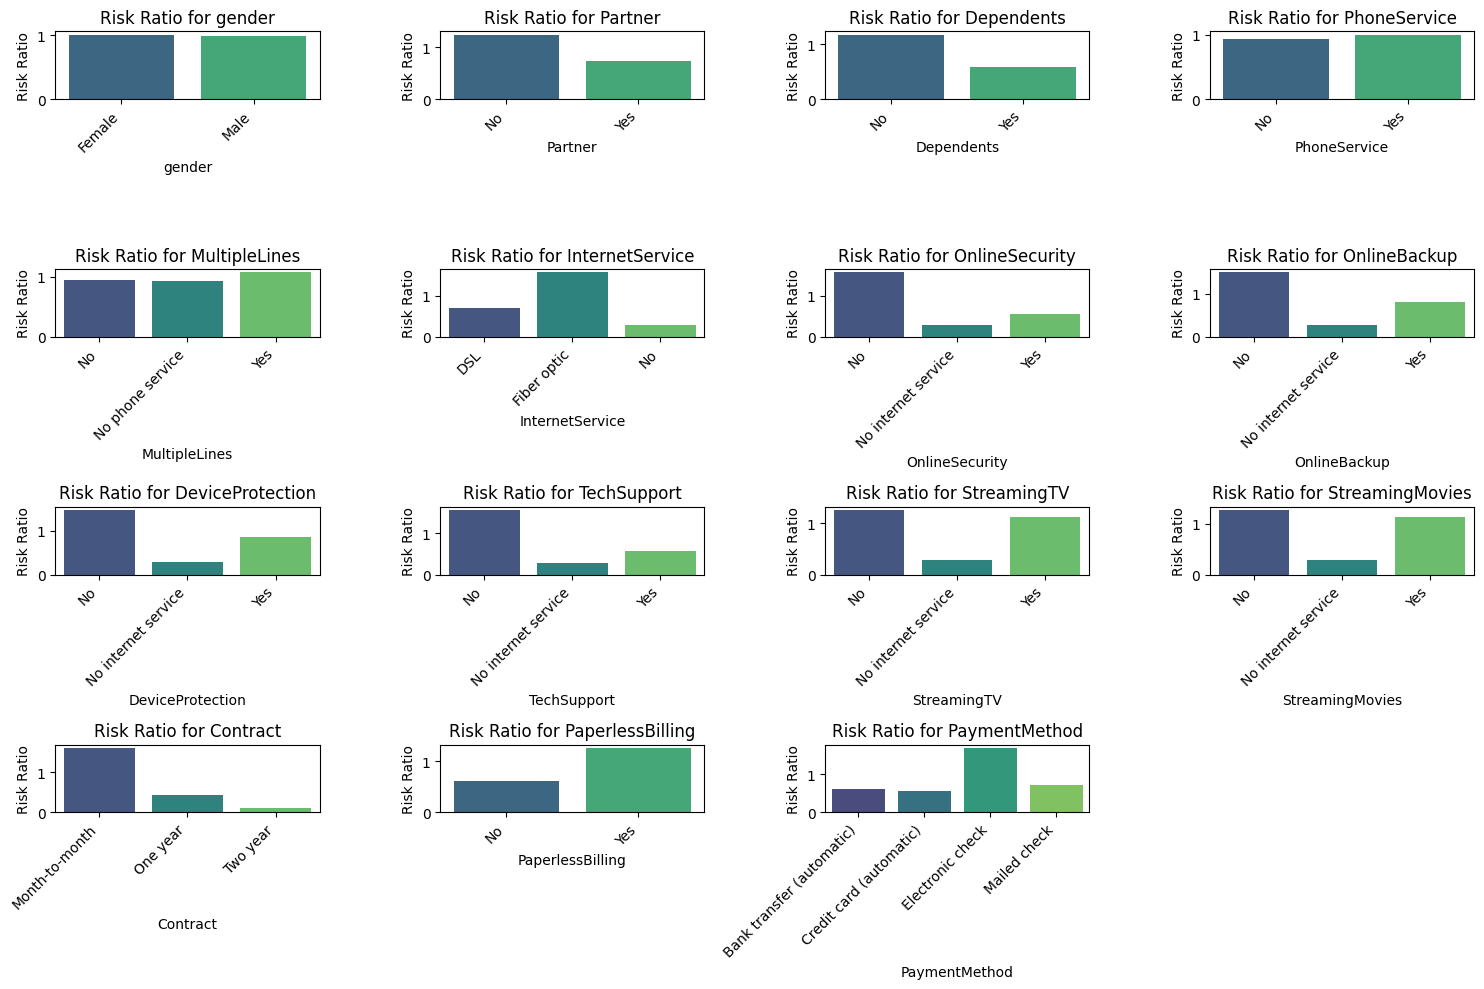

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def risk_ratio(df, feature, target):
    """Calculate the risk ratio for a feature."""
    churn_rates = df.groupby(feature)[target].mean()
    overall_rate = df[target].mean()
    risk_ratios = churn_rates / overall_rate
    return risk_ratios

# Example categorical features list
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                         'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaperlessBilling', 'PaymentMethod']

# Set up the visualization
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    # Calculate risk ratios
    ratios = risk_ratio(df_encoded, feature, 'Churn')

    # Create subplot for each feature
    plt.subplot(4, 4, i + 1)
    sns.barplot(x=ratios.index, y=ratios.values, palette='viridis')
    plt.title(f'Risk Ratio for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Risk Ratio')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Interpretation of Risk Ratios

The risk ratio tells us how the likelihood of churn differs between different categories of a feature compared to the overall churn rate. A risk ratio greater than 1 indicates a higher likelihood of churn compared to the overall rate, while a ratio less than 1 indicates a lower likelihood.

Here’s an interpretation of the risk ratios for each feature:

1. **Gender:**
   - **Female:** 1.014
   - **Male:** 0.986
   - **Interpretation:** The risk of churn is slightly higher for females compared to males, though the difference is minimal.

2. **Partner:**
   - **No:** 1.241
   - **Yes:** 0.742
   - **Interpretation:** Customers without a partner have a higher risk of churn compared to those with a partner.

3. **Dependents:**
   - **No:** 1.177
   - **Yes:** 0.584
   - **Interpretation:** Customers without dependents have a higher risk of churn compared to those with dependents.

4. **PhoneService:**
   - **No:** 0.941
   - **Yes:** 1.006
   - **Interpretation:** Customers with phone service have a slightly higher risk of churn than those without it.

5. **MultipleLines:**
   - **No:** 0.944
   - **No phone service:** 0.941
   - **Yes:** 1.078
   - **Interpretation:** Customers with multiple lines have a higher risk of churn compared to those without, and this risk is slightly higher for those with phone service.

6. **InternetService:**
   - **DSL:** 0.715
   - **Fiber optic:** 1.576
   - **No:** 0.280
   - **Interpretation:** Customers with fiber optic internet have a significantly higher risk of churn compared to those with DSL or no internet service.

7. **OnlineSecurity:**
   - **No:** 1.572
   - **No internet service:** 0.280
   - **Yes:** 0.551
   - **Interpretation:** Customers without online security have a higher risk of churn. Customers with no internet service have a lower risk of churn.

8. **OnlineBackup:**
   - **No:** 1.503
   - **No internet service:** 0.280
   - **Yes:** 0.811
   - **Interpretation:** Customers without online backup have a higher risk of churn, while those with no internet service have a lower risk.

9. **DeviceProtection:**
   - **No:** 1.473
   - **No internet service:** 0.280
   - **Yes:** 0.848
   - **Interpretation:** Customers without device protection have a higher risk of churn.

10. **TechSupport:**
    - **No:** 1.567
    - **No internet service:** 0.280
    - **Yes:** 0.572
    - **Interpretation:** Customers without tech support have a higher risk of churn.

11. **StreamingTV:**
    - **No:** 1.262
    - **No internet service:** 0.280
    - **Yes:** 1.133
    - **Interpretation:** Customers without streaming TV have a higher risk of churn.

12. **StreamingMovies:**
    - **No:** 1.269
    - **No internet service:** 0.280
    - **Yes:** 1.127
    - **Interpretation:** Customers without streaming movies have a higher risk of churn.

13. **Contract:**
    - **Month-to-month:** 1.607
    - **One year:** 0.424
    - **Two year:** 0.107
    - **Interpretation:** Customers with month-to-month contracts have a significantly higher risk of churn compared to those with longer-term contracts.

14. **PaperlessBilling:**
    - **No:** 0.616
    - **Yes:** 1.264
    - **Interpretation:** Customers with paperless billing have a higher risk of churn.

15. **PaymentMethod:**
    - **Bank transfer (automatic):** 0.630
    - **Credit card (automatic):** 0.574
    - **Electronic check:** 1.704
    - **Mailed check:** 0.722
    - **Interpretation:** Customers using electronic checks have the highest risk of churn.

### Summary of Important Features for Churn Prediction

Based on the risk ratios, the features that show a higher risk of churn (ratios > 1) are:

- **Partner:** No
- **Dependents:** No
- **MultipleLines:** Yes
- **InternetService:** Fiber optic
- **OnlineSecurity:** No
- **OnlineBackup:** No
- **DeviceProtection:** No
- **TechSupport:** No
- **StreamingTV:** No
- **StreamingMovies:** No
- **Contract:** Month-to-month
- **PaperlessBilling:** Yes
- **PaymentMethod:** Electronic check

These features indicate a higher likelihood of churn. If you're building a model to predict customer churn, you should pay particular attention to these features as they seem to have a significant impact on customer retention.

3. Mutual Information

             Feature  Mutual Information
14          Contract            0.091393
4             tenure            0.075246
8     OnlineSecurity            0.066166
11       TechSupport            0.063855
7    InternetService            0.058943
9       OnlineBackup            0.047900
17    MonthlyCharges            0.045704
16     PaymentMethod            0.044920
18      TotalCharges            0.043951
10  DeviceProtection            0.042767
13   StreamingMovies            0.037028
12       StreamingTV            0.035511
6      MultipleLines            0.016294
3         Dependents            0.015735
2            Partner            0.014533
15  PaperlessBilling            0.013367
1      SeniorCitizen            0.009781
5       PhoneService            0.000652
0             gender            0.000000


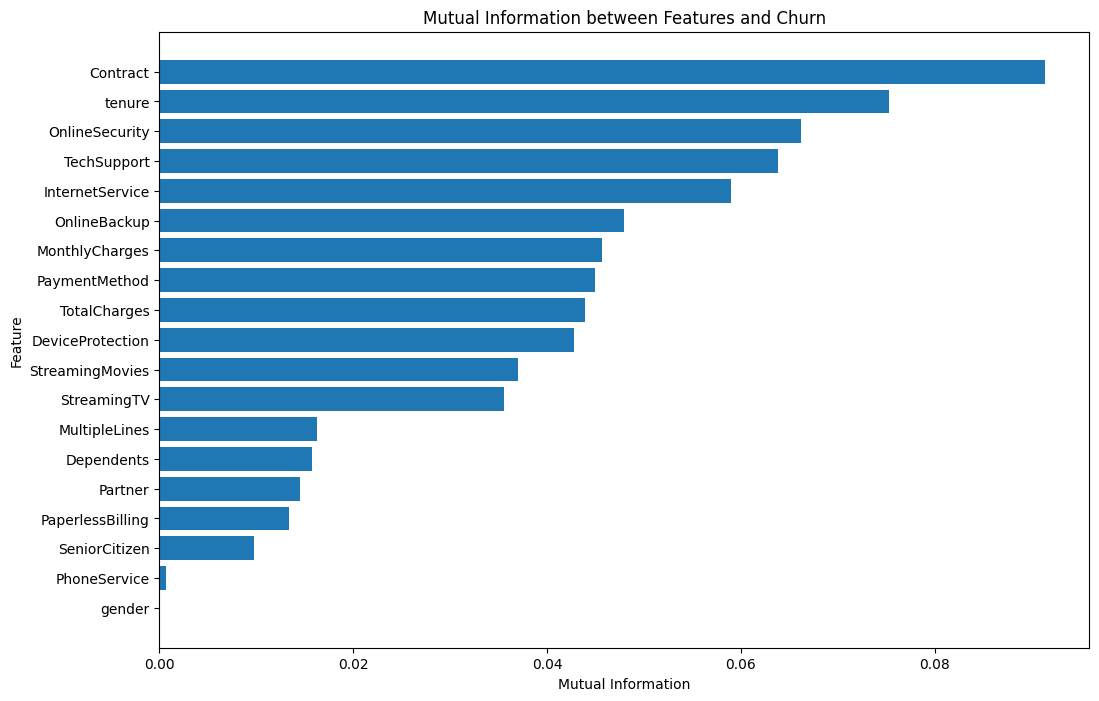

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode categorical features and target variable using LabelEncoder
def encode_features(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df

# Apply encoding
df_encoded = encode_features(df_encoded)

# Separate features and target
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Compute Mutual Information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display results
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

# Sort the DataFrame by Mutual Information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print(mutual_info_df)

# Optional: Plot mutual information
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(mutual_info_df['Feature'], mutual_info_df['Mutual Information'])
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Mutual Information between Features and Churn')
plt.gca().invert_yaxis()
plt.show()


Here’s an interpretation of the mutual information scores for each feature:

### Mutual Information Scores Interpretation

**Mutual Information** measures the dependency between two variables. Higher values indicate a stronger relationship with the target variable (in this case, `Churn`). Here are the key insights from your results:

1. **Contract (0.0956)**: This feature has the highest mutual information score. Different contract types have a significant impact on churn rates.

2. **tenure (0.0776)**: The length of time a customer has been with the service also shows a strong relationship with churn. Longer tenures may reduce churn or vice versa.

3. **OnlineSecurity (0.0674)**: Having online security appears to be moderately important. It could influence the decision to churn.

4. **InternetService (0.0641)**: The type of internet service (e.g., DSL, Fiber optic) is important for predicting churn. Different services likely have different churn rates.

5. **TechSupport (0.0626)**: Access to tech support seems to be related to churn. Better or worse tech support could impact customer retention.

6. **OnlineBackup (0.0515)**: The presence of online backup service has a moderate relationship with churn.

7. **MonthlyCharges (0.0453)**: Higher monthly charges are somewhat related to churn, but it’s less significant compared to other features.

8. **TotalCharges (0.0423)**: Total amount charged over time is also a factor, but its relationship with churn is not as strong as other features.

9. **DeviceProtection (0.0394)**: This feature shows a moderate impact on churn, likely influencing customer decisions.

10. **StreamingTV (0.0392)**: Availability of streaming TV services has a moderate effect on churn.

11. **PaymentMethod (0.0346)**: The method of payment has some influence on churn.

12. **StreamingMovies (0.0308)**: Similar to StreamingTV, streaming movies also have a moderate impact.

13. **Dependents (0.0180)**: The presence of dependents has a weaker relationship with churn compared to other features.

14. **PaperlessBilling (0.0105)**: Whether or not a customer uses paperless billing has a minor impact on churn.

15. **Partner (0.0101)**: Having a partner shows a very weak relationship with churn.

16. **SeniorCitizen (0.0096)**: Being a senior citizen has a very minimal effect on churn.

17. **gender (0.0069)**: Gender shows the weakest relationship with churn among the features considered.

18. **PhoneService (0.0052)**: Having phone service is almost negligible in its relationship with churn.

19. **MultipleLines (0.0000)**: The presence of multiple lines has no apparent relationship with churn in your dataset.

### Features to Focus On

Based on the mutual information scores, the features with higher values are more important for predicting churn. To build a model, you should prioritize:

1. **Contract**
2. **tenure**
3. **OnlineSecurity**
4. **InternetService**
5. **TechSupport**

These features have the highest mutual information scores, suggesting they have the most significant impact on customer churn. You might also consider including features with moderate scores if they add value to your model:

- **OnlineBackup**
- **MonthlyCharges**
- **TotalCharges**

The features with very low or zero mutual information (e.g., `gender`, `MultipleLines`) might not contribute much to the model's predictive power and could be considered for exclusion.



4. CORRELATION COEFFICIENT

Correlation Coefficients with Churn:
Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64


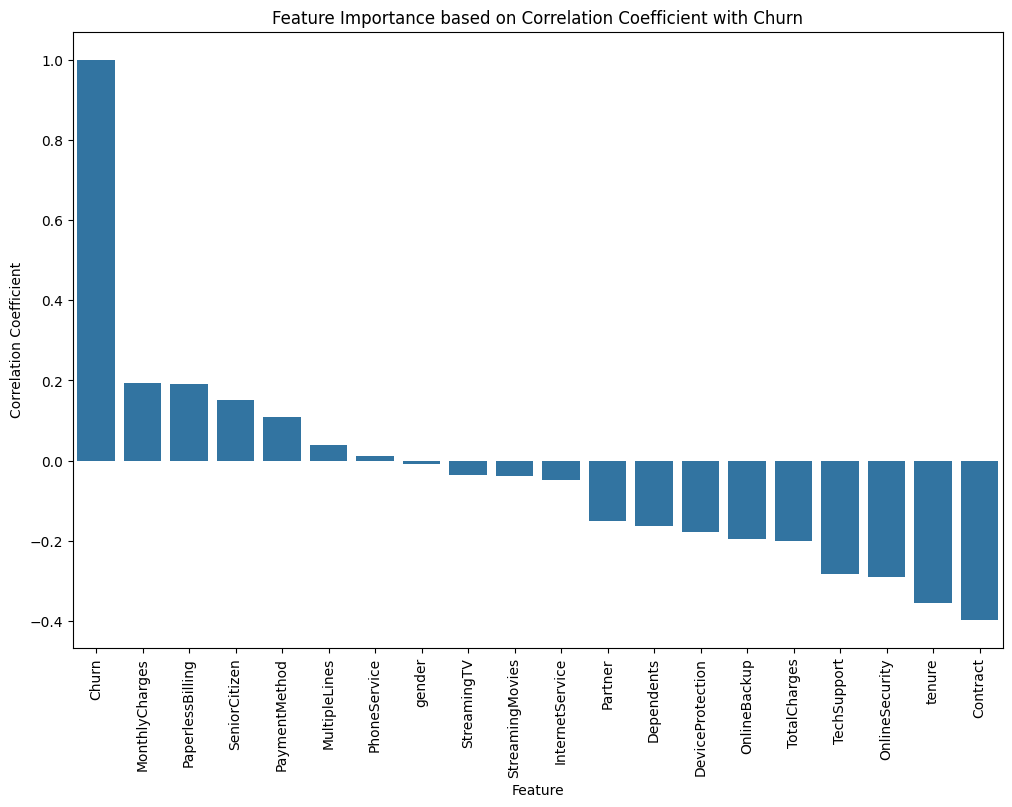

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlation of each feature with the target variable 'Churn'
correlation_with_target = correlation_matrix['Churn'].sort_values(ascending=False)

# Print the correlation values
print("Correlation Coefficients with Churn:")
print(correlation_with_target)

# Plotting the correlation coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Feature Importance based on Correlation Coefficient with Churn')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()


Based on the correlation coefficients with `Churn`, you can interpret the features in terms of their importance for predicting customer churn. Here's a detailed breakdown and recommendations for selecting features:

### Interpretation

1. **High Positive Correlation**:
   - **MonthlyCharges (0.192858)**: A higher monthly charge is positively associated with churn. Customers who pay more might be more likely to churn, potentially due to dissatisfaction with the value they receive.
   - **PaperlessBilling (0.191454)**: The presence of paperless billing is positively associated with churn. This might indicate that customers who opt for paperless billing are more likely to churn.
   - **SeniorCitizen (0.150541)**: Senior citizens are slightly more likely to churn compared to non-senior citizens.

2. **Moderate Negative Correlation**:
   - **Contract (-0.396150)**: Customers with month-to-month contracts are more likely to churn compared to those with one-year or two-year contracts. This suggests that longer-term contracts might reduce churn.
   - **tenure (-0.354049)**: Longer tenure is associated with lower churn rates. Customers who have been with the company longer are less likely to churn.
   - **TechSupport (-0.282232)**: The absence of tech support is strongly associated with higher churn rates. Customers without tech support are more likely to churn.
   - **OnlineSecurity (-0.289050)**: The absence of online security is associated with higher churn rates. Customers without online security are more likely to churn.
   - **TotalCharges (-0.199484)**: Higher total charges are negatively correlated with churn, meaning that customers who have paid more over time are less likely to churn.

3. **Low Correlation**:
   - **PaymentMethod (0.107852)**: The payment method has a weak positive correlation with churn.
   - **MultipleLines (0.038043)**: Very weak positive correlation with churn.
   - **PhoneService (0.011691)**: Very weak positive correlation with churn.
   - **gender (-0.008545)**: Minimal correlation with churn.
   - **StreamingTV (-0.036303)**: Very weak negative correlation with churn.
   - **StreamingMovies (-0.038802)**: Very weak negative correlation with churn.
   - **InternetService (-0.047097)**: Very weak negative correlation with churn.
   - **Partner (-0.149982)**: Slightly negative correlation with churn, meaning partnered customers might churn less.

4. **Strong Negative Correlation**:
   - **Dependents (-0.163128)**: Customers with dependents are slightly less likely to churn.
   - **DeviceProtection (-0.177883)**: The absence of device protection is associated with higher churn rates.
   - **OnlineBackup (-0.195290)**: The absence of online backup is associated with higher churn rates.

### Feature Selection Recommendations

Based on the correlation analysis, you should consider the following features for your predictive model:

1. **Highly Important Features**:
   - **Contract**: Strong negative correlation, indicating its importance in predicting churn.
   - **tenure**: Strong negative correlation, useful for understanding customer retention.
   - **TechSupport**: Strong negative correlation, suggesting its importance in predicting churn.
   - **OnlineSecurity**: Strong negative correlation, indicating its relevance.
   - **TotalCharges**: Moderately negative correlation, could be useful for predicting churn.

2. **Moderately Important Features**:
   - **MonthlyCharges**: Positive correlation, relevant for understanding churn based on billing amounts.
   - **PaperlessBilling**: Positive correlation, might be worth considering for churn prediction.

3. **Less Important Features**:
   - Features like **gender**, **PhoneService**, **StreamingTV**, and **StreamingMovies** have very weak correlations and may have limited impact on the model's performance.

### Final Selection

For a model, focusing on features with strong and moderate correlations (both positive and negative) will likely yield the best results. Therefore, features like `Contract`, `tenure`, `TechSupport`, `OnlineSecurity`, and `TotalCharges` should be prioritized in your model.


# Building the logistic regression model

Based on all methods (risk ratios, mutual information, and correlation analysis), the following features are consistently important and should be included in your model:

Contract: Strong impact on churn prediction (high mutual information, strong negative correlation).

tenure: Significant impact on churn (high mutual information, strong negative correlation).

OnlineSecurity: Important feature (high mutual information, strong negative correlation).

TechSupport: Strong impact on churn (high mutual information, strong negative correlation).

InternetService: Important based on mutual information scores.
MonthlyCharges: Positive correlation with churn.

TotalCharges: Moderately important (negative correlation with churn).

PaymentMethod: Different payment methods show varying risk ratios.

PaperlessBilling: Positive correlation with churn.

Dependents: Negative correlation with churn.

Partner: Weak negative correlation with churn.

Features to Exclude:
The following features show weak or negligible impact on churn prediction and can be excluded to avoid adding noise to the model:

gender: Minimal correlation with churn.
PhoneService: Very weak correlation with churn.
MultipleLines: No apparent relationship with churn.
StreamingTV: Very weak correlation.
StreamingMovies: Very weak correlation.
SeniorCitizen: Minimal effect on churn.
DeviceProtection: Weak impact based on correlation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Before feature selection

In [ ]:
# Define X and y
X1 = df_encoded[categorical_features]
y1 = df_encoded['Churn']
# Split the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train1, y_train1)

# Make predictions
y_pred1 = model.predict(X_test1)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test1, y_pred1))
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

Accuracy: 0.7753554502369668
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.59      0.49      0.54       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110



After feature selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

final_features = [
    'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
    'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'tenure'
]

# Define X and y
X = df_encoded[final_features]
y = df_encoded['Churn']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7886255924170616
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.61      0.56      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



#Prediction

In [ ]:
unique_features = {}

for column in df_encoded.columns:
    unique_values = df_encoded[column].unique()
    unique_features[column] = unique_values
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'gender': [0 1]
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': [1 0]
Unique values in column 'Dependents': [0 1]
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Unique values in column 'PhoneService': [0 1]
Unique values in column 'MultipleLines': [1 0 2]
Unique values in column 'InternetService': [0 1 2]
Unique values in column 'OnlineSecurity': [0 2 1]
Unique values in column 'OnlineBackup': [2 0 1]
Unique values in column 'DeviceProtection': [0 2 1]
Unique values in column 'TechSupport': [0 2 1]
Unique values in column 'StreamingTV': [0 2 1]
Unique values in column 'StreamingMovies': [0 2 1]
Unique values in column 'Contract': [0 1 2]
Unique values in column 'PaperlessBilling': [1 0]
Unique values in column 'PaymentMethod'

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']

In [ ]:
import pandas as pd

In [ ]:
new_customer = {
    'Partner' : 0,
    'Dependents' : 0,
    'InternetService' : 1,
    'OnlineSecurity' : 0,
    'TechSupport' : 0,
    'Contract' : 0,
    'PaperlessBilling' : 1,
    'PaymentMethod' : 0,
    'MonthlyCharges' : 85.7,
    'TotalCharges' : 85.7,
    'tenure' : 1
}

new_customer_df = pd.DataFrame([new_customer])

In [ ]:
# Predict churn probability
churn_prob = model.predict_proba(new_customer_df)[:, 1]

# Predict churn (0 or 1)
churn_prediction = model.predict(new_customer_df)

# Convert the numeric prediction to words
churn_prediction_word = "Yes" if churn_prediction[0] == 1 else "No"

# Print the results
print(f"Churn Probability: {churn_prob[0]:.2f}")
print(f"Churn Prediction: {churn_prediction_word}")

Churn Probability: 0.75
Churn Prediction: Yes
